### Given two list of x and y coordinates, and a list of errors on y, find the straight line that minimizes the sum of distances between the line and the (x,y) points.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
xdata = np.array([7129.89, 13241.22, 18277.42, 23992.65, 29085.42, 34630.89, 40572.47, 46004.77, 50135.58])*pow(10,-9)
xdata

array([7.129890e-06, 1.324122e-05, 1.827742e-05, 2.399265e-05,
       2.908542e-05, 3.463089e-05, 4.057247e-05, 4.600477e-05,
       5.013558e-05])

In [4]:
ydata = np.array([0.070, 0.130, 0.190, 0.250, 0.310, 0.370, 0.430, 0.490, 0.530])
yerr = np.array([0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

9

Determiniamo i parametri $a$ and $b$ della retta di best fit $y = b x + a$ che minimizza:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ e $b$ sono soluzioni del sistema lineare:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [5]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

Calcolo Coefficiente correlazione lineare

In [6]:
sum_x = (xdata).sum()
sum_y = (ydata).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdata-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydata-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print ("coefficiente correlazione = ",corrcoeff)

coefficiente correlazione =  0.999826909217107


In [7]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD

array([[4.59183673e+04, 1.34219546e+00],
       [1.34219546e+00, 4.82514150e-05]])

In [8]:
matD_inv = np.linalg.inv(matD)
matD_inv

array([[ 1.16510602e-04, -3.24094124e+00],
       [-3.24094124e+00,  1.10877093e+05]])

Check D^(-1)D = I

In [9]:
np.dot(matD,matD_inv)

array([[ 1.00000000e+00, -1.03599920e-11],
       [ 1.88474931e-20,  1.00000000e+00]])

In [10]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

array([1.41326531e+04, 5.10620355e-01])

In [11]:
np.dot(matD_inv,matB)

array([-8.28665120e-03,  1.08130023e+04])

Calcolo parametri fit

In [12]:
a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print (" intercetta a (u.m.)= ", a)
print (" coeff.angolare b (u.m.)= ", b)

 intercetta a (u.m.)=  -0.008286651198422942
 coeff.angolare b (u.m.)=  10813.002276029576


Calcolo errori sui parametri

In [13]:
siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (u.m.)= ",siga)
print (" errore su coeff.angolare sigb (u.m.)= ",sigb)

 errore su intercetta siga (u.m.)=  0.010794007682688343
 errore su coeff.angolare sigb (u.m.)=  332.9821207543259


Plot

<ErrorbarContainer object of 3 artists>

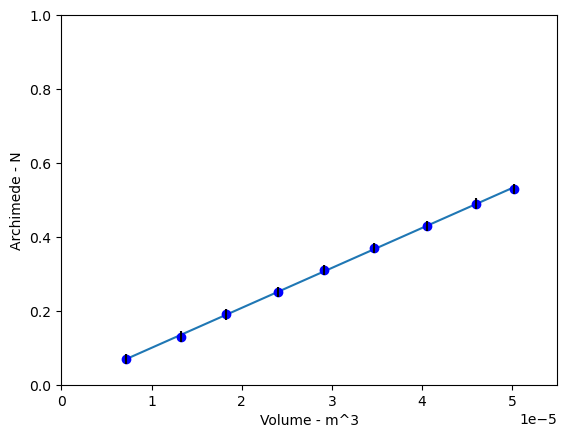

In [16]:
fig, ax = plt.subplots()
ax.set_ylim(0, 1)
ax.set_xlim(0, 0.000055)
ax.set_xlabel('Volume - m^3')
ax.set_ylabel('Archimede - N')
plt.plot(xdata,b*xdata+a,xdata,ydata,'bo')
plt.errorbar(xdata,ydata,yerr=yerr,ecolor='black', ls=" ")

Calcolo X^2 e errore standard della stima

In [15]:
scarto1 = (ydata-a-b*xdata)/yerr
scarto2 = (ydata-a-b*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)

 Chi^2 =  0.36514677282647867
 errore standard della stima (u.m.) =  0.0031975161671430846
